The RSI (Relative Strength Index) indicator is a popular indicator used for detecting if there is possible mean reversion going to happen. Recently, I used this indicator to spot a potential reversal in the S&P 500 (week of 8/3/2023). I felt that the market was a little too extended and I used this as well as my intuition to spot that the market was likely to pull back. I'd like to understand this a bit more from the data side and see if there is any evidence to my claim. 

The goal of this is to: 
* Compute the RSI for a bunch of stocks 
* Concretely define "pullback" in stock price
* Test rigorously this hypothesis that I have of using the RSI overbought conditions for potential pullbacks in price

We are going to test our calculations using one time series for SPY. Then, we are going to apply this to a bunch of stocks (using the top 100 stocks by volume) and then see what happens there. 

In [38]:
import yfinance as yf 
import pandas_ta as ta
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

In [39]:
spy = yf.download("SPY", progress = False)
spy['rsi'] = spy.ta.rsi()

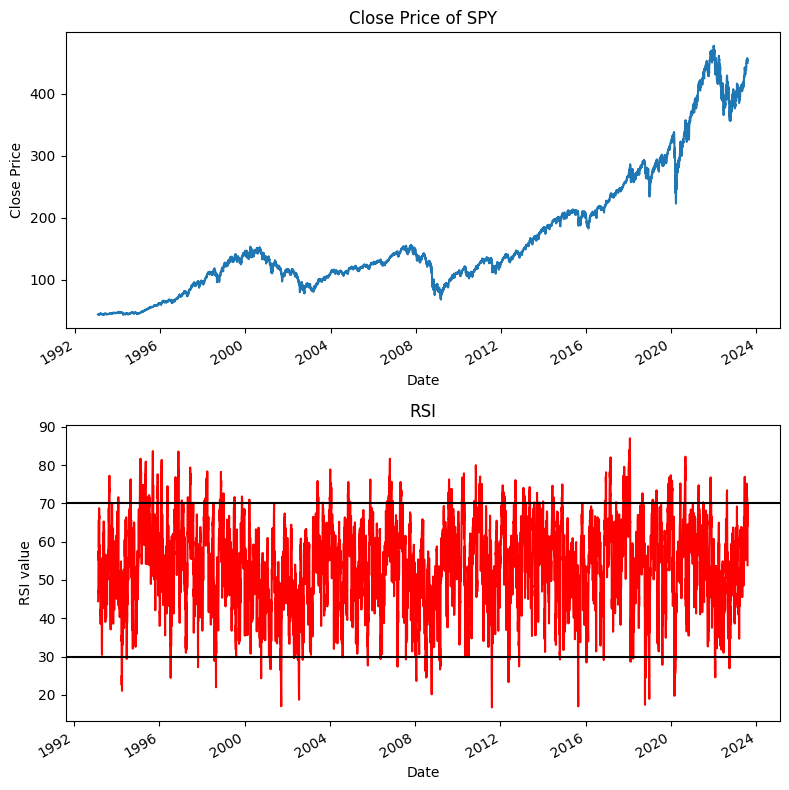

In [40]:
fig, ax = plt.subplots(2, 1, figsize = (8, 8))
spy['Close'].plot(ax = ax[0])
spy['rsi'].plot(ax = ax[1], color = 'red')
ax[0].set(xlabel = 'Date', ylabel = 'Close Price', title = 'Close Price of SPY')
ax[1].set(xlabel = 'Date', ylabel = 'RSI value', title = 'RSI')
ax[1].axhline(y = 70, xmin = 0, xmax = 1, color = 'black')
ax[1].axhline(y = 30, xmin = 0, xmax = 1, color = 'black')
fig.tight_layout()
plt.show()


Now, what do we mean by a "pullback". I would like to see if over the next N periods, there is a negative return if the RSI is > 70 or a positive return if the RSI < 30. These are the conventional bounds. What we can do is take the forward close to close returns as a proxy and see what happens when we cut by RSI level. 

In [41]:
PERIOD_LENGTHS = range(1, 16)
for period in PERIOD_LENGTHS: 
    # We calculate those period returns and then shift them back to today since we do not know them until they happen
    period_returns = spy['Close'].pct_change(period).shift(-period) 
    spy[f'{period}-day_forward_return'] = period_returns   

In [42]:
OVERBOUGHT_THRESHOLD = 70 
OVERSOLD_THRESHOLD = 30

spy_overbought = spy[spy['rsi'] >= OVERBOUGHT_THRESHOLD]
spy_oversold = spy[spy['rsi'] <= OVERSOLD_THRESHOLD]

In [46]:
spy_overbought.filter(like = 'return').describe().T.round(4)

,count,mean,std,min,25%,50%,75%,max
1-day_forward_return,515.0,-0.0004,0.0061,-0.0344,-0.0036,-0.0001,0.0027,0.0236
2-day_forward_return,515.0,-0.0006,0.0092,-0.0629,-0.0048,0.0004,0.0048,0.0313
3-day_forward_return,514.0,-0.0004,0.0108,-0.0699,-0.0055,0.0007,0.0059,0.0303
4-day_forward_return,514.0,-0.0006,0.0125,-0.0588,-0.0067,0.0011,0.0063,0.0335
5-day_forward_return,514.0,-0.0005,0.0137,-0.0729,-0.0072,0.0015,0.0078,0.0339
6-day_forward_return,513.0,-0.0001,0.0146,-0.0790,-0.0066,0.0016,0.0085,0.0395
7-day_forward_return,512.0,0.0001,0.0154,-0.0684,-0.0075,0.0026,0.0094,0.0431
8-day_forward_return,511.0,0.0005,0.0162,-0.0950,-0.0074,0.0032,0.0106,0.0417
9-day_forward_return,511.0,0.0008,0.0175,-0.1010,-0.0066,0.0032,0.0112,0.0410
10-day_forward_return,511.0,0.0010,0.0187,-0.0906,-0.0049,0.0041,0.0116,0.0400


In [47]:
spy_oversold.filter(like = 'return').describe().T.round(4)

,count,mean,std,min,25%,50%,75%,max
1-day_forward_return,115.0,0.0076,0.0289,-0.0698,-0.0095,0.0056,0.0197,0.1452
2-day_forward_return,115.0,0.0089,0.0357,-0.0933,-0.0078,0.0109,0.0260,0.1282
3-day_forward_return,115.0,0.0117,0.0390,-0.1153,-0.0068,0.0137,0.0312,0.1716
4-day_forward_return,115.0,0.0141,0.0354,-0.0673,-0.0095,0.0108,0.0354,0.1367
5-day_forward_return,115.0,0.0158,0.0423,-0.1254,-0.0062,0.0134,0.0384,0.1736
6-day_forward_return,115.0,0.0172,0.0454,-0.1089,-0.0018,0.0158,0.0391,0.1561
7-day_forward_return,115.0,0.0182,0.0472,-0.1248,-0.0058,0.0214,0.0386,0.1735
8-day_forward_return,115.0,0.0184,0.0478,-0.1230,-0.0052,0.0173,0.0428,0.1598
9-day_forward_return,115.0,0.0146,0.0509,-0.1657,-0.0090,0.0165,0.0436,0.1618
10-day_forward_return,115.0,0.0145,0.0574,-0.1870,-0.0122,0.0146,0.0464,0.2072


From this initial analysis, this is very interesting. We see that when we are "overbought" on the RSI, you do not get too much information on direction. However, when you are oversold on the RSI, the returns are usually positive. You also do not see too many of these signals coming through over the history of SPY (only 115 times this has been hit). So we should always watch for when SPY has hit this level and probably buy some call options potentially for a bit of profit. 

We could also turn this into a classification problem. That will be the part of another notebook. The goal is to understand how we can set up mean reversion strategies and I want to use the classical technical indicators to do this. 
